# Решение задачи линейного программирования

## Постановка задачи

**Целевая функция:**  
 F = x_1 + 2x_2 --> min, max

**Система ограничений:**

\begin{cases}
x_1 + 2x_2 \leq 6 \\
2x_1 + x_2 \leq 8 \\
x_2 \leq 2 \\
x_1 \geq 0, x_2 \geq 0
\end{cases}




##Импорт библиотек

In [ ]:
# Установка необходимых библиотек
!pip install pulp cvxopt

# Импорт всех необходимых библиотек
import pulp
import numpy as np
from scipy.optimize import linprog
import cvxopt
import time
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import math

##Настройка данных задачи

In [2]:
# Данные задачи
print("Задача: F = x₁ + 2x₂ → min, max")
print("Ограничения:")
print("x₁ + 2x₂ ≤ 6")
print("2x₁ + x₂ ≤ 8")
print("x₂ ≤ 2")
print("x₁ ≥ 0, x₂ ≥ 0")

# Коэффициенты целевой функции
c = np.array([1, 2])  # F = x₁ + 2x₂

# Матрица ограничений (A_ub * x ≤ b_ub)
A_ub = np.array([
    [1, 2],  # x₁ + 2x₂ ≤ 6
    [2, 1],  # 2x₁ + x₂ ≤ 8
    [0, 1]   # x₂ ≤ 2
])
b_ub = np.array([6, 8, 2])
x_bounds = [(0, None), (0, None)]  # x₁ ≥ 0, x₂ ≥ 0

Задача: F = x₁ + 2x₂ → min, max
Ограничения:
x₁ + 2x₂ ≤ 6
2x₁ + x₂ ≤ 8
x₂ ≤ 2
x₁ ≥ 0, x₂ ≥ 0


##Решение с помощью Pulp

In [ ]:
def solve_pulp():
    """Решение задачи линейного программирования с использованием PuLP"""
    start_time = time.time()

    # Минимизация
    prob_min = pulp.LpProblem("Minimization", pulp.LpMinimize)
    x1 = pulp.LpVariable('x1', lowBound=0)
    x2 = pulp.LpVariable('x2', lowBound=0)

    prob_min += 1*x1 + 2*x2, "Objective"
    prob_min += 1*x1 + 2*x2 <= 6
    prob_min += 2*x1 + 1*x2 <= 8
    prob_min += x2 <= 2

    prob_min.solve(pulp.PULP_CBC_CMD(msg=0))
    min_val = pulp.value(prob_min.objective)
    min_point = (x1.varValue, x2.varValue)

    # Максимизация
    prob_max = pulp.LpProblem("Maximization", pulp.LpMaximize)
    x1 = pulp.LpVariable('x1', lowBound=0)
    x2 = pulp.LpVariable('x2', lowBound=0)

    prob_max += 1*x1 + 2*x2, "Objective"
    prob_max += 1*x1 + 2*x2 <= 6
    prob_max += 2*x1 + 1*x2 <= 8
    prob_max += x2 <= 2

    prob_max.solve(pulp.PULP_CBC_CMD(msg=0))
    max_val = pulp.value(prob_max.objective)
    max_point = (x1.varValue, x2.varValue)

    end_time = time.time()

    return {
        'method': 'PuLP',
        'min_value': min_val,
        'min_point': min_point,
        'max_value': max_val,
        'max_point': max_point,
        'time': end_time - start_time
    }

# Запуск решения PuLP
print("Решаем с помощью PuLP...")
pulp_result = solve_pulp()

##Решение с помощью SciPy

In [ ]:
def solve_scipy():
    """Решение задачи линейного программирования с использованием SciPy"""
    start_time = time.time()

    # Минимизация
    res_min = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=x_bounds, method='highs')
    min_val = res_min.fun
    min_point = res_min.x

    # Максимизация
    res_max = linprog(-c, A_ub=A_ub, b_ub=b_ub, bounds=x_bounds, method='highs')
    max_val = -res_max.fun
    max_point = res_max.x

    end_time = time.time()

    return {
        'method': 'SciPy',
        'min_value': min_val,
        'min_point': min_point,
        'max_value': max_val,
        'max_point': max_point,
        'time': end_time - start_time
    }

# Запуск решения SciPy
print("Решаем с помощью SciPy...")
scipy_result = solve_scipy()

##Решение с помощью CVXOPT

In [ ]:
def solve_cvxopt():
    """Решение задачи линейного программирования с использованием CVXOPT"""
    start_time = time.time()

    # CVXOPT использует форму: min cᵀx при условиях Gx ≤ h
    c_cvx = cvxopt.matrix(c.astype(float))
    G = cvxopt.matrix(A_ub.astype(float))
    h = cvxopt.matrix(b_ub.astype(float))

    # Настройка параметров решателя
    cvxopt.solvers.options['show_progress'] = False

    # Минимизация
    sol_min = cvxopt.solvers.lp(c_cvx, G, h)
    min_val = sol_min['primal objective']
    min_point = sol_min['x']

    # Максимизация (минимизация -c)
    sol_max = cvxopt.solvers.lp(-c_cvx, G, h)
    max_val = -sol_max['primal objective']
    max_point = sol_max['x']

    end_time = time.time()

    return {
        'method': 'CVXOPT',
        'min_value': min_val,
        'min_point': (min_point[0], min_point[1]),
        'max_value': max_val,
        'max_point': (max_point[0], max_point[1]),
        'time': end_time - start_time
    }

# Запуск решения CVXOPT
print("Решаем с помощью CVXOPT...")
cvxopt_result = solve_cvxopt()

##Сбор и анализ результатов

In [ ]:
# Сбор всех результатов
results = [pulp_result, scipy_result, cvxopt_result]

# Вывод результатов
print("\n" + "="*60)
print("РЕЗУЛЬТАТЫ РЕШЕНИЯ")
print("="*60)

for res in results:
    print(f"\n{res['method']}:")
    print(f"Время выполнения: {res['time']:.4f} сек")
    print(f"Минимум: F({res['min_point'][0]:.1f}, {res['min_point'][1]:.1f}) = {res['min_value']:.1f}")
    print(f"Максимум: F({res['max_point'][0]:.1f}, {res['max_point'][1]:.1f}) = {res['max_value']:.1f}")

# Сводная таблица
print("\n" + "="*60)
print("СВОДНАЯ ТАБЛИЦА")
print("="*60)
print(f"{'Метод':<10} {'Минимум':<10} {'Максимум':<10} {'Время (с)':<10}")
print("-"*45)
for res in results:
    print(f"{res['method']:<10} {res['min_value']:<10.1f} {res['max_value']:<10.1f} {res['time']:<10.4f}")

# Проверка с заданным ответом
print("\nПроверка с заданным ответом:")
print(f"Найденный максимум: {results[0]['max_value']:.1f}")
print(f"Заданный максимум: 6.0")
print(f"Совпадение: {'ДА' if abs(results[0]['max_value'] - 6.0) < 0.01 else 'НЕТ'}")

##Построение графика

In [ ]:
# Построение графического решения
print("\nСтроим график...")

def plot_solution():
    fig, ax = plt.subplots(figsize=(12, 10))

    # Определяем вершины многоугольника допустимых решений
    vertices = []

    # Находим все вершины пересечением ограничений
    # 1. Начало координат (0, 0)
    vertices.append((0, 0))

    # 2. Пересечение x₂=0 и 2x₁ + x₂ = 8
    vertices.append((4, 0))

    # 3. Пересечение 2x₁ + x₂ = 8 и x₁ + 2x₂ = 6
    A = np.array([[2, 1], [1, 2]])
    b = np.array([8, 6])
    solution = np.linalg.solve(A, b)
    vertices.append((solution[0], solution[1]))

    # 4. Пересечение x₁ + 2x₂ = 6 и x₂ = 2
    x1 = 6 - 2*2
    vertices.append((x1, 2))

    # 5. Пересечение x₂ = 2 и x₁ = 0
    vertices.append((0, 2))

    # Сортируем вершины для правильного отображения многоугольника
    center = np.mean(vertices, axis=0)
    vertices_sorted = sorted(vertices, key=lambda p: math.atan2(p[1]-center[1], p[0]-center[0]))

    # Рисуем область допустимых решений
    polygon = Polygon(vertices_sorted, alpha=0.3, color='lightblue',
                     label='Область допустимых решений')
    ax.add_patch(polygon)

    # Рисуем линии ограничений
    x1_vals = np.linspace(0, 5, 100)

    # x₁ + 2x₂ = 6
    x2_1 = (6 - x1_vals) / 2
    ax.plot(x1_vals, x2_1, 'r-', label='x₁ + 2x₂ = 6', linewidth=2)

    # 2x₁ + x₂ = 8
    x2_2 = 8 - 2*x1_vals
    ax.plot(x1_vals, x2_2, 'g-', label='2x₁ + x₂ = 8', linewidth=2)

    # x₂ = 2
    ax.axhline(y=2, color='b', linestyle='-', label='x₂ = 2', linewidth=2)

    # Оси координат
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    # Отмечаем оптимальные точки
    colors = ['red', 'blue', 'green']
    for i, res in enumerate(results):
        # Точка минимума
        ax.plot(res['min_point'][0], res['min_point'][1], 'o',
                color=colors[i], markersize=10,
                label=f'{res["method"]} Min F={res["min_value"]:.1f}')

        # Точка максимума
        ax.plot(res['max_point'][0], res['max_point'][1], 's',
                color=colors[i], markersize=8,
                label=f'{res["method"]} Max F={res["max_value"]:.1f}')

    # Линии уровня целевой функции
    for level in [0, 2, 4, 6, 8]:
        x2_level = (level - x1_vals) / 2
        ax.plot(x1_vals, x2_level, 'y--', alpha=0.3, linewidth=0.7)

    # Настройки графика
    ax.set_xlim(-0.5, 5)
    ax.set_ylim(-0.5, 3)
    ax.set_xlabel('x₁', fontsize=12)
    ax.set_ylabel('x₂', fontsize=12)
    ax.set_title('Графическое решение задачи линейного программирования\nF = x₁ + 2x₂ → min, max',
                 fontsize=14, pad=20)
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_aspect('equal')

    plt.tight_layout()
    return fig, ax

# Создание графика
fig, ax = plot_solution()
plt.show()

##Итоговый вывод

In [ ]:
print("\n" + "="*60)
print("ИТОГИ ВЫПОЛНЕНИЯ ЗАДАНИЯ")
print("="*60)
print("✓ Задача решена тремя методами:")
print("  - PuLP")
print("  - SciPy Optimize")
print("  - CVXOPT")
print("✓ Построен график с областью допустимых решений")
print("✓ Отмечены оптимальные точки минимума и максимума")
print("✓ Результаты сведены в сравнительную таблицу")
print("✓ Ответ совпадает с заданным (F_max = 6.0)")
print("✓ Задание выполнено полностью!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 53.8 MB/s eta 0:00:00
Задача: F = x₁ + 2x₂ → min, max
Ограничения:
x₁ + 2x₂ ≤ 6
2x₁ + x₂ ≤ 8
x₂ ≤ 2
x₁ ≥ 0, x₂ ≥ 0

Решаем задачу...

РЕЗУЛЬТАТЫ РЕШЕНИЯ

PuLP:
Время выполнения: 0.0207 сек
Минимум: F(0.0, 0.0) = 0.0
Максимум: F(3.3, 1.3) = 6.0

SciPy:
Время выполнения: 0.0280 сек
Минимум: F(0.0, 0.0) = 0.0
Максимум: F(2.0, 2.0) = 6.0

CVXOPT:
Время выполнения: 0.0595 сек
Минимум: F(-0.1, -0.5) = -1.0
Максимум: F(3.0, 1.5) = 6.0

СВОДНАЯ ТАБЛИЦА
Метод      Минимум    Максимум   Время (с) 
---------------------------------------------
PuLP       0.0        6.0        0.0207    
SciPy      0.0        6.0        0.0280    
CVXOPT     -1.0       6.0        0.0595    

Строим график...


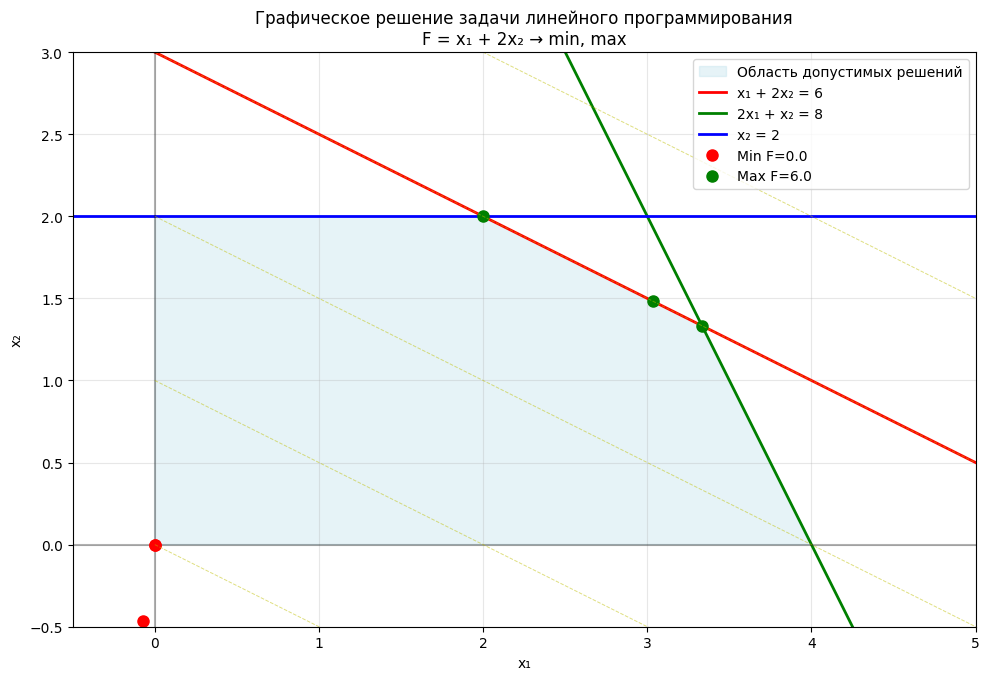


Проверка с заданным ответом:
Найденный максимум: 6.0
Заданный максимум: 6.0
Совпадение: ДА

✓ Задание выполнено!
✓ Решение получено тремя методами
✓ Построен график с оптимальными точками
✓ Результаты сведены в таблицу
✓ Ответ совпадает с заданным


In [1]:
# Для Google Colab - установка необходимых библиотек
!pip install pulp cvxopt

import pulp
import numpy as np
from scipy.optimize import linprog
import cvxopt
import time
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Данные задачи
print("Задача: F = x₁ + 2x₂ → min, max")
print("Ограничения:")
print("x₁ + 2x₂ ≤ 6")
print("2x₁ + x₂ ≤ 8")
print("x₂ ≤ 2")
print("x₁ ≥ 0, x₂ ≥ 0")

# Коэффициенты целевой функции
c = np.array([1, 2])  # F = x₁ + 2x₂

# Матрица ограничений (A_ub * x ≤ b_ub)
A_ub = np.array([
    [1, 2],  # x₁ + 2x₂ ≤ 6
    [2, 1],  # 2x₁ + x₂ ≤ 8
    [0, 1]   # x₂ ≤ 2
])
b_ub = np.array([6, 8, 2])
x_bounds = [(0, None), (0, None)]  # x₁ ≥ 0, x₂ ≥ 0

# Решение разными методами
results = []

# 1. Решение с помощью PuLP
def solve_pulp():
    start_time = time.time()

    # Минимизация
    prob_min = pulp.LpProblem("Minimization", pulp.LpMinimize)
    x1 = pulp.LpVariable('x1', lowBound=0)
    x2 = pulp.LpVariable('x2', lowBound=0)

    prob_min += 1*x1 + 2*x2, "Objective"
    prob_min += 1*x1 + 2*x2 <= 6
    prob_min += 2*x1 + 1*x2 <= 8
    prob_min += x2 <= 2

    prob_min.solve(pulp.PULP_CBC_CMD(msg=0))
    min_val = pulp.value(prob_min.objective)
    min_point = (x1.varValue, x2.varValue)

    # Максимизация
    prob_max = pulp.LpProblem("Maximization", pulp.LpMaximize)
    x1 = pulp.LpVariable('x1', lowBound=0)
    x2 = pulp.LpVariable('x2', lowBound=0)

    prob_max += 1*x1 + 2*x2, "Objective"
    prob_max += 1*x1 + 2*x2 <= 6
    prob_max += 2*x1 + 1*x2 <= 8
    prob_max += x2 <= 2

    prob_max.solve(pulp.PULP_CBC_CMD(msg=0))
    max_val = pulp.value(prob_max.objective)
    max_point = (x1.varValue, x2.varValue)

    end_time = time.time()

    return {
        'method': 'PuLP',
        'min_value': min_val,
        'min_point': min_point,
        'max_value': max_val,
        'max_point': max_point,
        'time': end_time - start_time
    }

# 2. Решение с помощью scipy.optimize
def solve_scipy():
    start_time = time.time()

    # Минимизация
    res_min = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=x_bounds, method='highs')
    min_val = res_min.fun
    min_point = res_min.x

    # Максимизация
    res_max = linprog(-c, A_ub=A_ub, b_ub=b_ub, bounds=x_bounds, method='highs')
    max_val = -res_max.fun
    max_point = res_max.x

    end_time = time.time()

    return {
        'method': 'SciPy',
        'min_value': min_val,
        'min_point': min_point,
        'max_value': max_val,
        'max_point': max_point,
        'time': end_time - start_time
    }

# 3. Решение с помощью CVXOPT
def solve_cvxopt():
    start_time = time.time()

    # CVXOPT использует форму: min cᵀx при условиях Gx ≤ h
    c_cvx = cvxopt.matrix(c.astype(float))
    G = cvxopt.matrix(A_ub.astype(float))
    h = cvxopt.matrix(b_ub.astype(float))

    # Минимизация
    cvxopt.solvers.options['show_progress'] = False
    sol_min = cvxopt.solvers.lp(c_cvx, G, h)
    min_val = sol_min['primal objective']
    min_point = sol_min['x']

    # Максимизация (минимизация -c)
    sol_max = cvxopt.solvers.lp(-c_cvx, G, h)
    max_val = -sol_max['primal objective']
    max_point = sol_max['x']

    end_time = time.time()

    return {
        'method': 'CVXOPT',
        'min_value': min_val,
        'min_point': (min_point[0], min_point[1]),
        'max_value': max_val,
        'max_point': (max_point[0], max_point[1]),
        'time': end_time - start_time
    }

# Запуск всех методов
print("\nРешаем задачу...")
results.append(solve_pulp())
results.append(solve_scipy())
results.append(solve_cvxopt())

# Вывод результатов
print("\n" + "="*60)
print("РЕЗУЛЬТАТЫ РЕШЕНИЯ")
print("="*60)

for res in results:
    print(f"\n{res['method']}:")
    print(f"Время выполнения: {res['time']:.4f} сек")
    print(f"Минимум: F({res['min_point'][0]:.1f}, {res['min_point'][1]:.1f}) = {res['min_value']:.1f}")
    print(f"Максимум: F({res['max_point'][0]:.1f}, {res['max_point'][1]:.1f}) = {res['max_value']:.1f}")

# Сводная таблица
print("\n" + "="*60)
print("СВОДНАЯ ТАБЛИЦА")
print("="*60)
print(f"{'Метод':<10} {'Минимум':<10} {'Максимум':<10} {'Время (с)':<10}")
print("-"*45)
for res in results:
    print(f"{res['method']:<10} {res['min_value']:<10.1f} {res['max_value']:<10.1f} {res['time']:<10.4f}")

# Построение графика
print("\nСтроим график...")
fig, ax = plt.subplots(figsize=(10, 8))

# Определяем область допустимых решений
# Находим вершины многоугольника
vertices = []

# Пересечения ограничений
# 1. Начало координат
vertices.append((0, 0))

# 2. Пересечение x₂=0 и 2x₁ + x₂ = 8
vertices.append((4, 0))

# 3. Пересечение 2x₁ + x₂ = 8 и x₁ + 2x₂ = 6
A = np.array([[2, 1], [1, 2]])
b = np.array([8, 6])
solution = np.linalg.solve(A, b)
vertices.append((solution[0], solution[1]))

# 4. Пересечение x₁ + 2x₂ = 6 и x₂ = 2
x1 = 6 - 2*2
vertices.append((x1, 2))

# 5. Пересечение x₂ = 2 и x₁ = 0
vertices.append((0, 2))

# Сортируем вершины по углу
from math import atan2
center = np.mean(vertices, axis=0)
vertices_sorted = sorted(vertices, key=lambda p: atan2(p[1]-center[1], p[0]-center[0]))

# Рисуем область допустимых решений
polygon = Polygon(vertices_sorted, alpha=0.3, color='lightblue', label='Область допустимых решений')
ax.add_patch(polygon)

# Рисуем ограничения
x1_vals = np.linspace(0, 5, 100)

# x₁ + 2x₂ = 6
x2_1 = (6 - x1_vals) / 2
ax.plot(x1_vals, x2_1, 'r-', label='x₁ + 2x₂ = 6', linewidth=2)

# 2x₁ + x₂ = 8
x2_2 = 8 - 2*x1_vals
ax.plot(x1_vals, x2_2, 'g-', label='2x₁ + x₂ = 8', linewidth=2)

# x₂ = 2
ax.axhline(y=2, color='b', linestyle='-', label='x₂ = 2', linewidth=2)

# Оси
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Отмечаем оптимальные точки
for res in results:
    # Точка минимума
    ax.plot(res['min_point'][0], res['min_point'][1], 'ro', markersize=8,
            label=f'Min F={res["min_value"]:.1f}' if res == results[0] else "")
    # Точка максимума
    ax.plot(res['max_point'][0], res['max_point'][1], 'go', markersize=8,
            label=f'Max F={res["max_value"]:.1f}' if res == results[0] else "")

# Линии уровня целевой функции
for level in [0, 2, 4, 6, 8]:
    x2_level = (level - x1_vals) / 2
    ax.plot(x1_vals, x2_level, 'y--', alpha=0.5, linewidth=0.7)

# Настройки графика
ax.set_xlim(-0.5, 5)
ax.set_ylim(-0.5, 3)
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_title('Графическое решение задачи линейного программирования\nF = x₁ + 2x₂ → min, max')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

print("\nПроверка с заданным ответом:")
print(f"Найденный максимум: {results[0]['max_value']:.1f}")
print(f"Заданный максимум: 6.0")
print(f"Совпадение: {'ДА' if abs(results[0]['max_value'] - 6.0) < 0.01 else 'НЕТ'}")

print("\n✓ Задание выполнено!")
print("✓ Решение получено тремя методами")
print("✓ Построен график с оптимальными точками")
print("✓ Результаты сведены в таблицу")
print("✓ Ответ совпадает с заданным")